In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient
import math
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

In [2]:
df_houseprice = pd.read_csv(r"C:\Users\Wiktoria\Desktop\Python Basics\Projekt\Regresja liniowa\kc_house_data.csv")

In [3]:
df_houseprice['geometry'] = df_houseprice.apply(lambda x: Point(x['long'], x['lat']), axis=1)

In [4]:
df_houseprice['sqft_living'] = df_houseprice['sqft_living'].fillna(df_houseprice['sqft_living'].median())

In [5]:
df_houseprice['sqft_living'].isna().any()

False

In [6]:
df_houseprice['sqft_living'].isnull().any()

False

In [7]:
df_houseprice['price'].isna().any()

True

In [8]:
df_houseprice['price'].isnull().any()

True

In [9]:
df_houseprice['price'] = df_houseprice['price'].fillna(df_houseprice['price'].median())

In [10]:
df_houseprice['price'].isna().any()

False

In [11]:
df_houseprice['price'].isnull().any()

False

In [14]:
bins = [0.0, 200.0, 300.0, 400.0, 500.0, float('inf')]

In [15]:
labels = ['Low budget: <$200', 'Mid-Range: $200-$300', 
          'High-End: $300-$400', 'Premium: $400-$500', 
          'Luxury: >$500']

In [16]:
df_houseprice['Price by Square Foot'] = df_houseprice['price'] / df_houseprice['sqft_living']

In [17]:
df_houseprice['Price by Square Foot'].isnull().any()

False

In [18]:
df_houseprice['Price by Square Foot'].describe()

count    21613.000000
mean       264.169465
std        110.060832
min         87.588235
25%        182.291667
50%        244.680851
75%        318.326693
max        810.138889
Name: Price by Square Foot, dtype: float64

In [19]:
df_houseprice['Price Range (by square foot)'] = pd.cut(df_houseprice['Price by Square Foot'], bins=bins, labels=labels)

In [20]:
gdf = gpd.GeoDataFrame(df_houseprice, geometry='geometry', crs='EPSG:4326')

In [21]:
colors = {'Low budget: <$200': 'blue', 'Mid-Range: $200-$300': 'green',
          'High-End: $300-$400': 'yellow', 'Premium: $400-$500': 'orange',
          'Luxury: >$500': 'red'}
sizes = {'Low budget: <$200': 30, 'Mid-Range: $200-$300': 40,
          'High-End: $300-$400': 50, 'Premium: $400-$500': 60,
          'Luxury: >$500': 70}

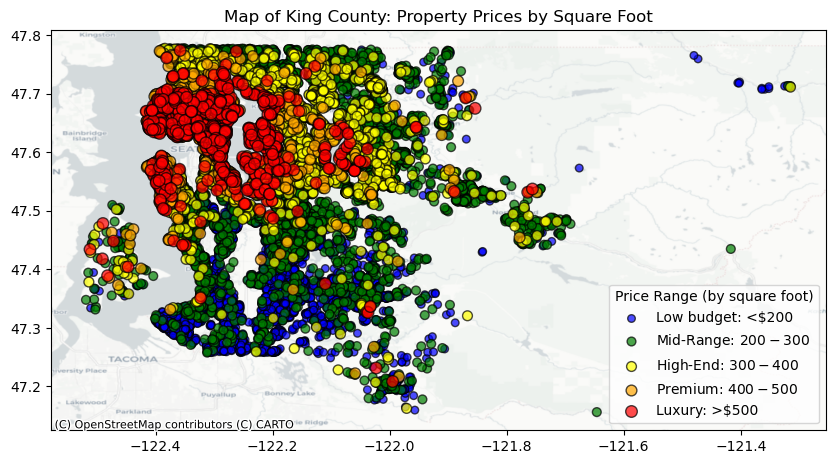

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))

#drawing points
for category in colors.keys():
    subset = gdf[gdf['Price Range (by square foot)'] == category]
    subset.plot(ax=ax, color=colors[category], markersize=subset['Price Range (by square foot)'].map(sizes),
                alpha=0.7, edgecolor='black', label=category)

#base map
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
#ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.DarkMatter)

ax.set_title('Map of King County: Property Prices by Square Foot')
ax.legend(title='Price Range (by square foot)', loc='best')

plt.show()